In [1]:
library('tidyverse')
library('ggrepel')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”


In [2]:
pell <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-08-30/pell.csv')

Rows: 100474 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): STATE, NAME, SESSION
dbl (3): AWARD, RECIPIENT, YEAR

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
pell |> head()

STATE,AWARD,RECIPIENT,NAME,SESSION,YEAR
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
AK,197232.9,109,Alaska Pacific University,1999-00,1999
AK,133148.0,69,Alaska Vocational Technical Center,1999-00,1999
AK,107287.0,72,Sheldon Jackson College,1999-00,1999
AK,3425148.8,1920,University of Alaska - Anchorage,1999-00,1999
AK,2441864.0,1256,University of Alaska at Fairbanks,1999-00,1999
AK,353170.0,221,University of Alaska at Southeast,1999-00,1999


STATE,AWARD,RECIPIENT,NAME,SESSION,YEAR
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
AL,5520921,2369,Alabama Agricultural & Mechanical University,1999-00,1999
AL,1548659,837,Alabama Southern Community College,1999-00,1999
AL,7164037,3236,Alabama State University,1999-00,1999
AL,1514341,854,Athens State University,1999-00,1999
AL,5449458,2842,Auburn University,1999-00,1999
AL,3255470,1661,Auburn University Montgomergy,1999-00,1999


Warning message:
“Removed 24 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


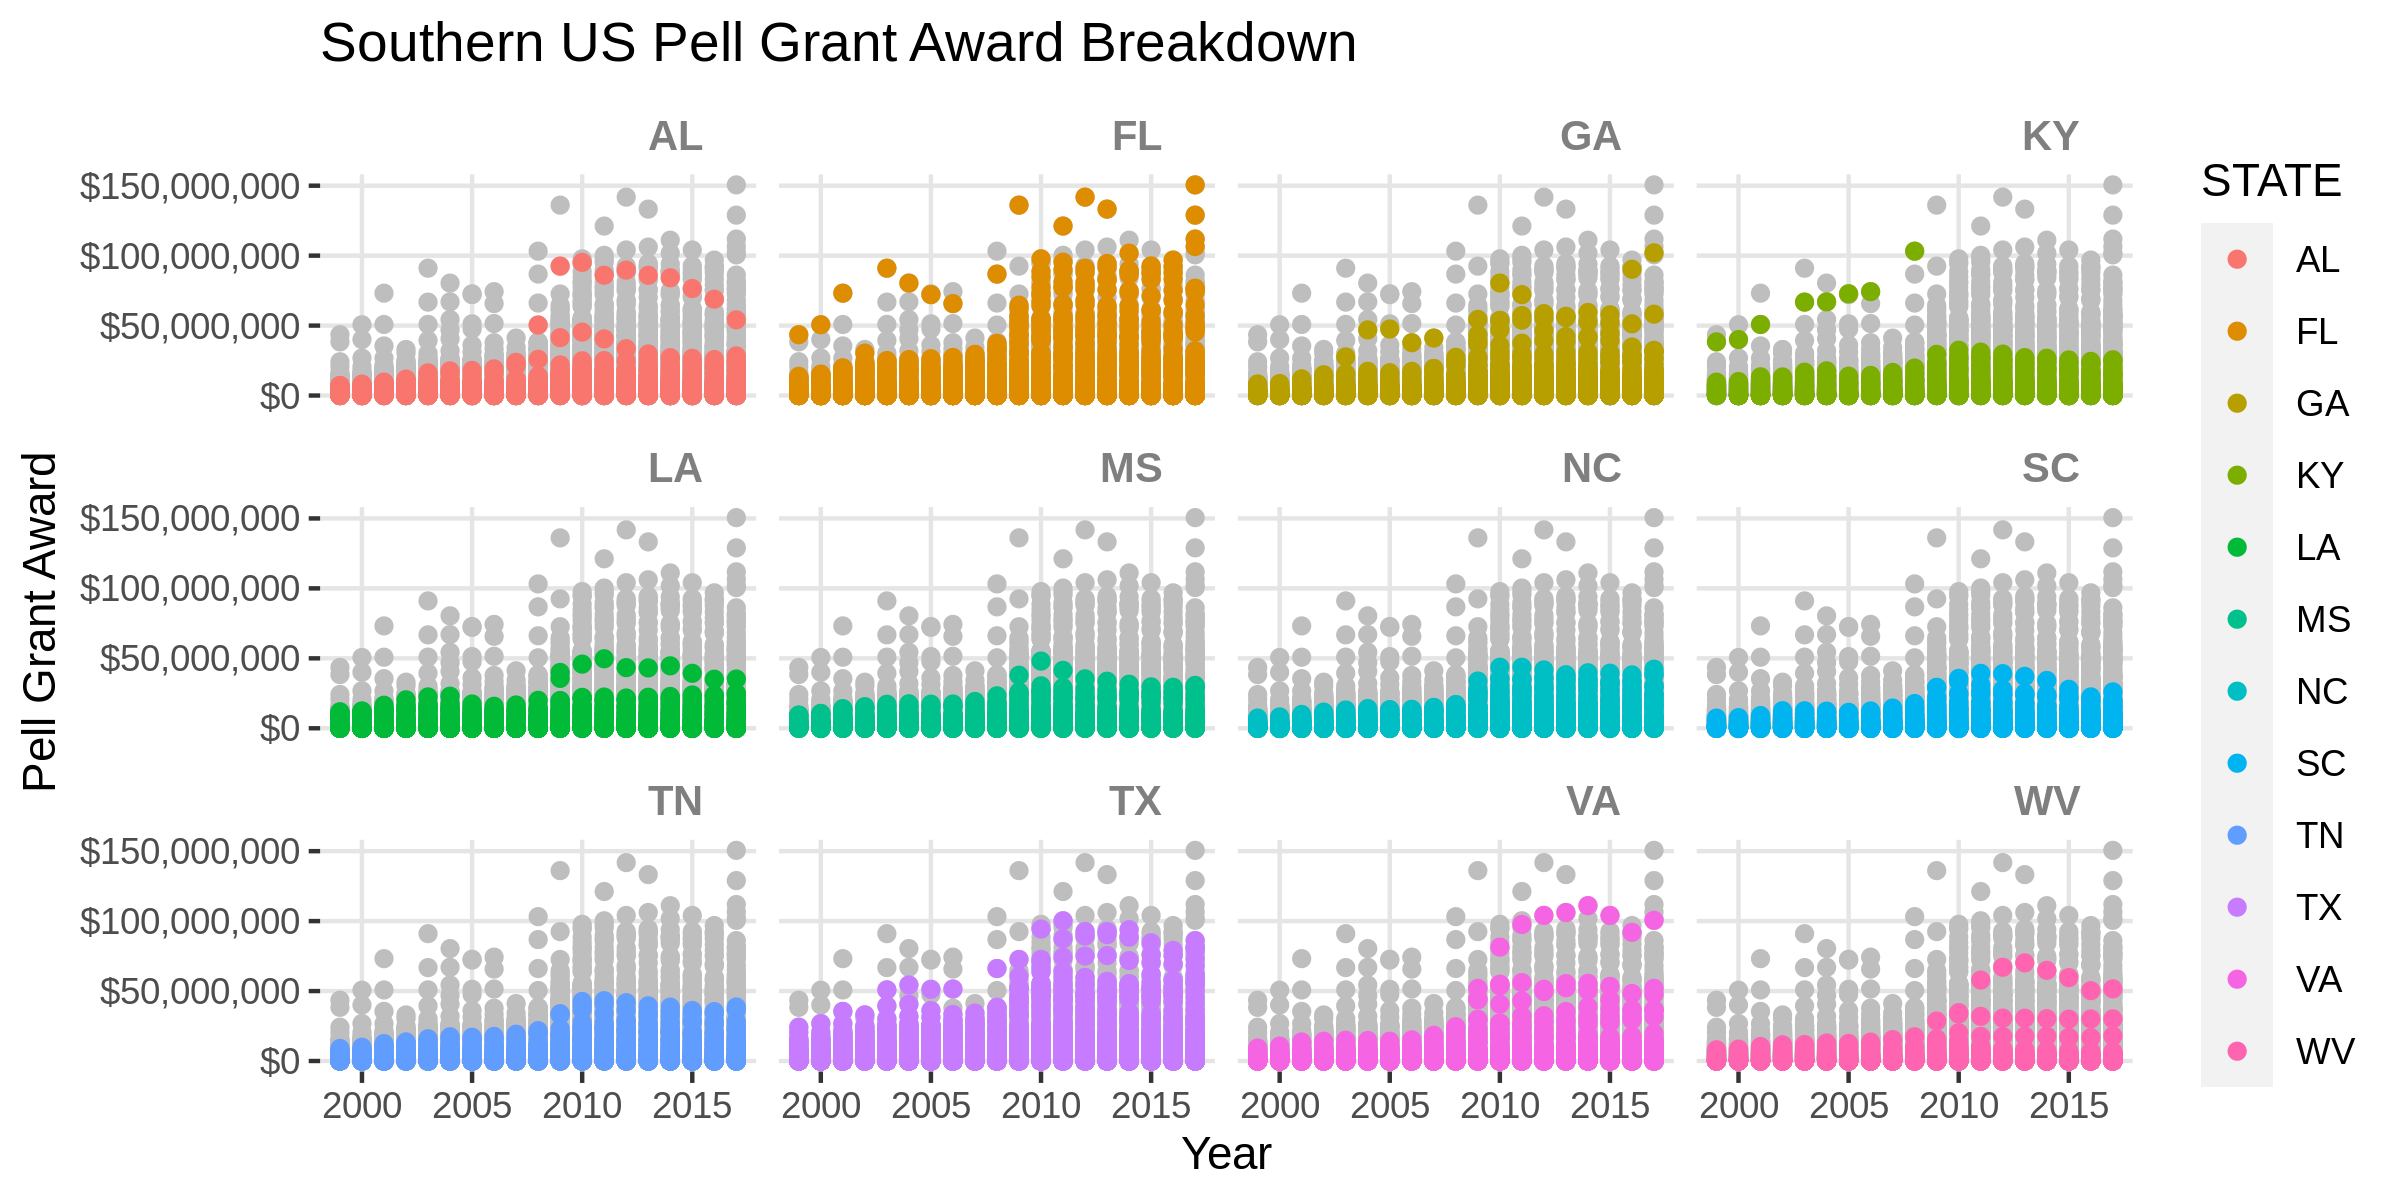

In [4]:
options(repr.plot.width = 8)

pell_south = pell |>
    filter(`STATE` == 'SC'|`STATE` == 'GA'|`STATE` == 'KY'
           |`STATE` == 'VA'|`STATE` == 'AL'|`STATE` == 'TN'
           |`STATE` == 'FL'|`STATE` == 'NC'|`STATE` == 'MS'
           |`STATE` == 'TX'|`STATE` == 'WV'|`STATE` == 'LA'
           |`STATE` == 'LA')

pell_south |> head()

p = ggplot(pell_south, aes(x = `YEAR`, y = `AWARD`, color = `STATE`)) +
    geom_point(color = 'gray', data = pell_south %>% select(-STATE)) +
    geom_point() +
    facet_wrap(~STATE) +
    scale_y_continuous(labels = scales::dollar_format()) +
    theme(panel.grid.major = element_line(color = "gray90"), 
          panel.background = element_blank(),
          strip.text = element_text(hjust = 0.9, color = 'grey50', face = 'bold', size = 10), 
          strip.background = element_blank()) +
    labs(x = 'Year', y = 'Pell Grant Award', title = "Southern US Pell Grant Award Breakdown")

p

The dataset I used aggregates the data for Pell Grant awards from 1999 to 2017. The dataset is organized by—state, award amount, number of recipients, and year. First, I created a scatterplot of grant award amounts throughout time by state (in the US South). From this visualization, Florida and Texas receive the most Pell Grant awards when compared to other US Southern states. 

STATE,AWARD,RECIPIENT,NAME,SESSION,YEAR
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
NC,1056966,597,Alamance Community College,1999-00,1999
NC,3434483,1913,Appalachian State University,1999-00,1999
NC,1270612,784,Asheville Buncombe Technical Community College,1999-00,1999
NC,908891,342,Barber-Scotia College,1999-00,1999
NC,643285,344,Barton College,1999-00,1999
NC,1025293,508,Beaufort County Community College,1999-00,1999


Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


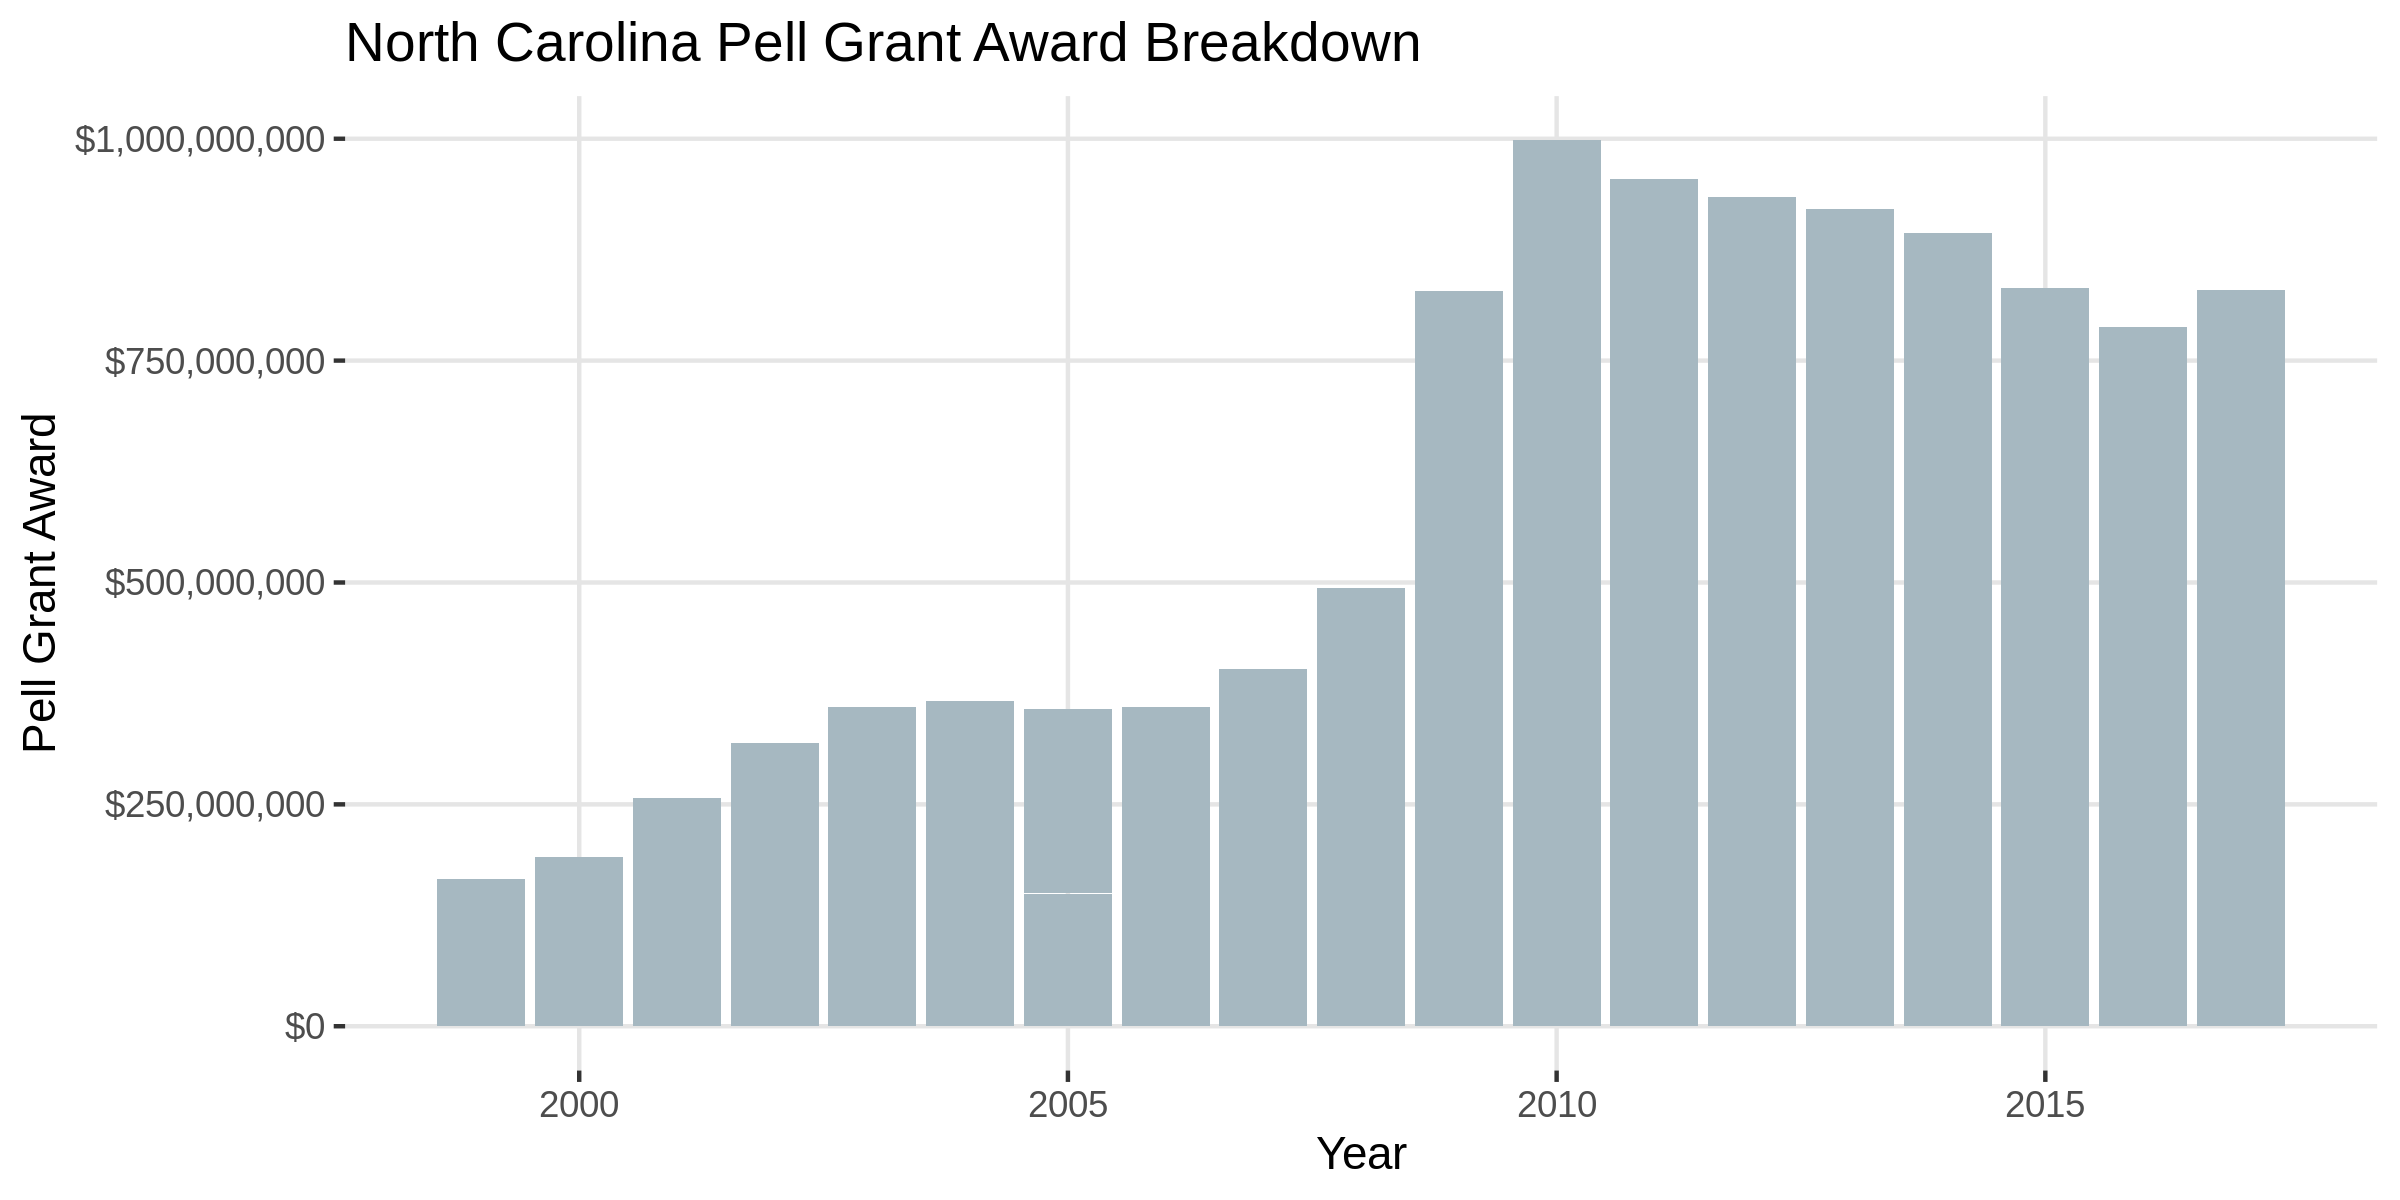

In [5]:
options(repr.plot.width = 8)

pell_nc = pell |>
    filter(`STATE` == 'NC')

pell_nc |> head()

p = ggplot(pell_nc, aes(x = YEAR, label = AWARD)) +    
    geom_bar(aes(y = AWARD), stat = 'identity', fill = '#A6B8C1') +
    scale_y_continuous(labels = scales::dollar_format())+
    theme(panel.grid.major = element_line(color = "gray90"), panel.background = element_blank()) +
    labs(x = 'Year', y = 'Pell Grant Award', title = "North Carolina Pell Grant Award Breakdown")
    
p

My next visualization is a bar chart showcasing the amount North Carolina awards in Pell Grants from 1999 to 2017. From 2008 to 2010, there was a sharp increase in awards, which follows the trend in other southern states. Before 2008 the average amount of awards was $300-$400 million; however, after 2008, it was around $900 million.

STATE,AWARD,RECIPIENT,NAME,SESSION,YEAR
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
NC,19008999,4771,Appalachian State University,2014-15,2014
NC,33527725,7971,East Carolina University,2014-15,2014
NC,6178634,1347,Elizabeth City State University,2014-15,2014
NC,14909042,3433,Fayetteville State University,2014-15,2014
NC,26520047,5930,North Carolina A&t State Univ,2014-15,2014
NC,18834681,4167,North Carolina Central University,2014-15,2014


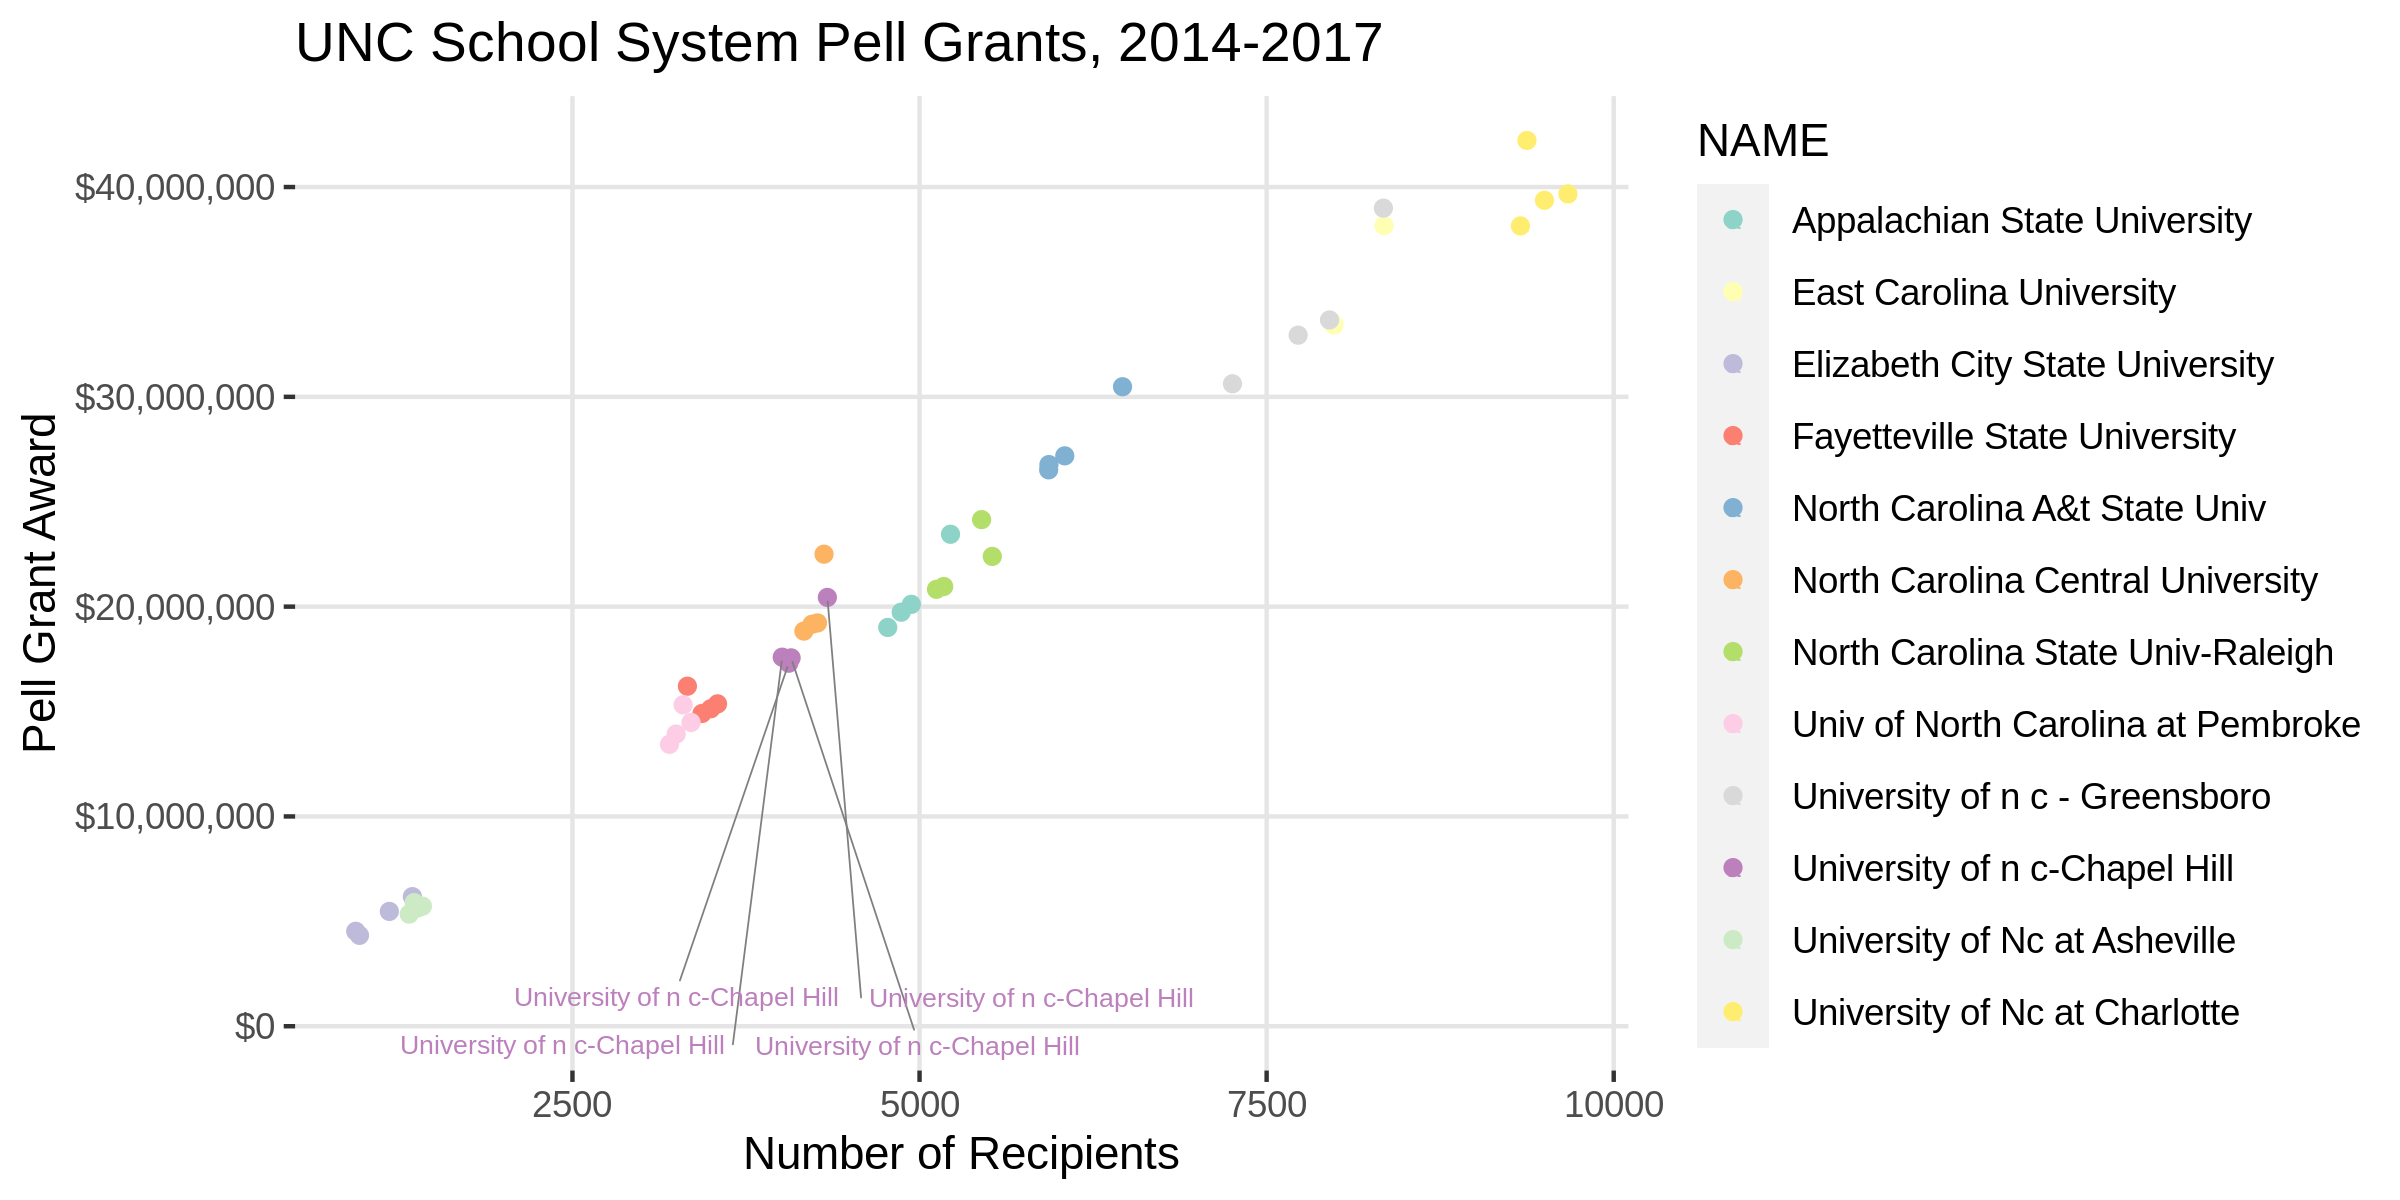

In [18]:
options(repr.plot.width = 8)

pell_unc = pell_nc |>
    filter(`NAME` == 'University of n c-Chapel Hill'|`NAME` == 'University of Nc at Charlotte'
           |`NAME` == 'University of n c - Greensboro'|`NAME` == 'University of Nc at Asheville'
           |`NAME` == 'Appalachian State University'|`NAME` == 'East Carolina University'
           |`NAME` == 'Elizabeth City State University'|`NAME` == 'Fayetteville State University'
           |`NAME` == 'North Carolina A&t State Univ'|`NAME` == 'North Carolina Central University'
           |`NAME` == 'North Carolina State Univ-Raleigh'|`NAME` == 'Univ of North Carolina at Pembroke')

pell_unc_year = pell_unc |>
    filter(`YEAR` > 2013)

pell_unc_year |> head()



filtered.data = pell_unc_year %>% filter(NAME == 'University of n c-Chapel Hill')


p = ggplot(pell_unc_year, aes(x = `RECIPIENT`, y = `AWARD`, color = `NAME`)) +
    geom_point() +
    scale_color_brewer(palette = 'Set3') +
    scale_y_continuous(labels = scales::dollar_format()) +
    theme(panel.grid.major = element_line(color = "gray90"), panel.background = element_blank()) +
    labs(x = 'Number of Recipients', y = 'Pell Grant Award', title = "UNC School System Pell Grants, 2014-2017") +
    geom_text_repel(
            data = filtered.data,
            nudge_y = 36 - filtered.data$AWARD,
            segment.size = 0.2,
            size = 2.25,
            segment.color = "grey50",
            aes(label = NAME),)

p

My last visualization is a scatterplot showcasing the relationship between the Pell Grant award amounts and the number of recipients within the UNC school system from 2014 to 2017. The two variables have a linear and positive relationship. UNC-Chapel Hill shows that around 4000 students consistently received around $20 million in total. In comparison, Elizabeth City State University consistently received the least award amount (~$5 million) with the least amount of recipients (~1000), and UNC-Charlotte consistently received the most award amount (~$40 million) with the most amount of recipients (~10000).